# IDENTIFYING HANDWRITTEN DIGITS


### Aim: To compare the performance of a feed-forward neural network with different number of hidden layers
###### NOTE: CODE COULD HAVE BEEN A LOT SHORTER , BUT SINCE THIS WAS A SPONTANEOUS EXPERIMENT , IT MAY BE A BIT REPETITIVE

In [199]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms

In [200]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

In [201]:
#Transforms.ToTensor() - converts the images into numbers understandable by the sysem (R,B,G)
#transforms.Noramlize() - normalizes the tensor with a meann and std dev - parameters

In [202]:
train_dataset = datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [203]:
trainloader = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=True)

In [204]:
dataiter = iter(trainloader)
images , labels = dataiter.next()

In [205]:
images.shape
#64 - batch size , each image has 28 x 28 pixels

torch.Size([64, 1, 28, 28])

In [206]:
labels.shape
#64 images have 64 labels

torch.Size([64])

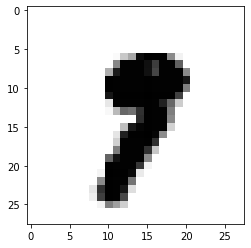

In [207]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

# BUILDING NEURAL NETWORK  

### With one hidden layer 

In [208]:
input_size = 28*28
hidden_size =128
output_size = 10

In [209]:
model = nn.Sequential(nn.Linear(input_size,hidden_size), 
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))

In [210]:
criterion = nn.NLLLoss()

In [211]:
images,labels = next(iter(trainloader))

#converting images to (64,784)
images  = images.view(images.shape[0],-1)

logps = model(images)

loss = criterion(logps,labels)

print(loss)

tensor(2.3110, grad_fn=<NllLossBackward>)


In [212]:
#adjusting the weights
print("before backward pass: ",model[0].weight.grad)
loss.backward()
print("after backward pass: ",model[0].weight.grad)

before backward pass:  None
after backward pass:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [213]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [214]:
epochs = 10
for epoch in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion1(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()       

In [215]:
correct_count , total_count = 0,0
for images,labels in testloader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        with torch.no_grad():
            logps = model(img)
            
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count+=1;
        total_count+=1

print('accuracy : ' , correct_count/total_count)

accuracy :  0.9304


### With 2 hidden layers (Negative Loss Likelihood)

In [225]:
input_size = 28*28
hidden_sizes = [128,64]
output_size = 10

In [226]:
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]), 
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

In [227]:
#nn sequential wraps the layers in the network

#log soft max is used because it is a classification problem 

In [228]:
#loss function used here is negative log likelihood function
criterion = nn.NLLLoss()

In [229]:
images,labels = next(iter(trainloader))

#converting images to (64,784)
images  = images.view(images.shape[0],-1)

logps = model(images)

loss = criterion(logps,labels)

print(loss)

tensor(2.3126, grad_fn=<NllLossBackward>)


In [230]:
#adjusting the weights
print("before backward pass: ",model[0].weight.grad)
loss.backward()
print("after backward pass: ",model[0].weight.grad)

before backward pass:  None
after backward pass:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [231]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [232]:
epochs = 10
for epoch in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()       

Predicted Digit =  7


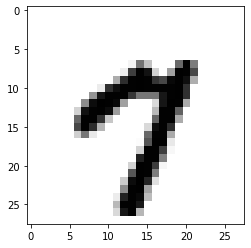

In [233]:
images, labels = next(iter(testloader))
img = images[0].view(1,784)

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit = ",probab.index(max(probab)))
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

In [234]:
correct_count , total_count = 0,0
for images,labels in testloader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        with torch.no_grad():
            logps = model(img)
            
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count+=1;
        total_count+=1

print('accuracy : ' , correct_count/total_count)

accuracy :  0.9335


### With three hidden layers

In [216]:
input_size = 28*28
hidden_sizes = [128,64,32]
output_size = 10

In [217]:
model = nn.Sequential(nn.Linear(input_size,hidden_size), 
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]), 
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],hidden_sizes[2]), 
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))

In [218]:
criterion = nn.NLLLoss()

In [219]:
images,labels = next(iter(trainloader))

#converting images to (64,784)
images  = images.view(images.shape[0],-1)

logps = model(images)

loss = criterion(logps,labels)

print(loss)

tensor(2.3171, grad_fn=<NllLossBackward>)


In [220]:
#adjusting the weights
print("before backward pass: ",model[0].weight.grad)
loss.backward()
print("after backward pass: ",model[0].weight.grad)

before backward pass:  None
after backward pass:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [221]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [222]:
epochs = 10
for epoch in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion1(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()       

Predicted Digit =  1


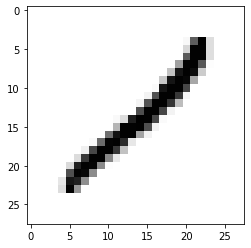

In [223]:
images, labels = next(iter(testloader))
img = images[0].view(1,784)

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit = ",probab.index(max(probab)))
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

In [224]:
correct_count , total_count = 0,0
for images,labels in testloader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        with torch.no_grad():
            logps = model(img)
            
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count+=1;
        total_count+=1

print('accuracy : ' , correct_count/total_count)

accuracy :  0.9387


# Observation and Conclusion

As the number of hidden layers increased , the accuracy of the model also increased
1 hidden layer - 0.9304 
2 hidden layers - 0.9335
3 hidden layers - 0.9387

However , we can see that the increase in performance is not significant. Thus it is not preffered to have more than 2 hidden layers if we are working on the same dataset in the same way as it will just increase the complexity of the program with no significant addvantage in accuracy 